<a href="https://colab.research.google.com/github/ShayCohenn/data-visualization-2/blob/main/day_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Tends Data**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [97]:
df_tsla = pd.read_csv('./TESLA Search Trend vs Price.csv')
df_unemployment = pd.read_csv('./UE Benefits Search vs UE Rate 2004-19.csv')
df_btc_search = pd.read_csv('./Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('./Daily Bitcoin Price.csv')

What are the shapes of the DataFrames? <br>
How many rows & columns do they have? <br>
What are the column names? <br>

In [98]:
data_frames = {'df_tsla': df_tsla, 'df_unemployment': df_unemployment, 'df_btc_price': df_btc_price, 'df_btc_search': df_btc_search}

for name, frame in data_frames.items():
    shape = frame.shape
    rows, columns = shape
    columns_names = list(frame.columns)
    print(f"{name }: {rows = }, {columns = }, {shape = }, {columns_names = }")


df_tsla: rows = 124, columns = 3, shape = (124, 3), columns_names = ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']
df_unemployment: rows = 181, columns = 3, shape = (181, 3), columns_names = ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']
df_btc_price: rows = 2204, columns = 3, shape = (2204, 3), columns_names = ['DATE', 'CLOSE', 'VOLUME']
df_btc_search: rows = 73, columns = 2, shape = (73, 2), columns_names = ['MONTH', 'BTC_NEWS_SEARCH']


 Investigate all 4 DataFrames and find if there are any missing values?

If yes, find how many missing or NaN values there are. Then, find the row where the missing values occur.

Finally, remove any rows that contain missing values.

In [99]:
for name, frame in data_frames.items():
  missing: bool = frame.isna().values.any()
  print(f"Are there any missing values for {name}? {missing}")

  if missing:
      print(f"Number of missing values in {name}: {missing}")

      missing_rows = frame[frame.isna().any(axis=1)]
      print(f"Rows with missing values in {name}:")
      print(missing_rows)

      frame.dropna(inplace=True)
      print(f"Missing values removed from {name}.")


Are there any missing values for df_tsla? False
Are there any missing values for df_unemployment? False
Are there any missing values for df_btc_price? True
Number of missing values in df_btc_price: True
Rows with missing values in df_btc_price:
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN
Missing values removed from df_btc_price.
Are there any missing values for df_btc_search? False


Convert any strings you find into Datetime objects. Do this for all 4 DataFrames. Double-check if your type conversion was successful.

In [100]:
for name, frame in data_frames.items():
  frame[frame.columns[0]] = pd.to_datetime(frame[frame.columns[0]])
  print(frame[frame.columns[0]])

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]
0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
176   2018-09-01
177   2018-10-01
178   2018-11-01
179   2018-12-01
180   2019-01-01
Name: MONTH, Length: 181, dtype: datetime64[ns]
0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]
0    2014-09-01
1    2014-10-01
2    2014-11-01
3    2014-12-01
4    2015-01-01
        ...    
68   2020-05-01
69   2020-06-01
70   2020-07-01
71   2020-08-01
72   2020-09-01
Name: MONTH, Length: 73, dtype: datetime64[ns]


Convet the Bitcoin daily price to monthly - create 1 df with the price at the end of each month, 1 with the price at the start and 1 with the average price per month

In [101]:
df_btc_monthly_first = df_btc_price.resample('M', on='DATE').first()
df_btc_monthly_last = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly_avg = df_btc_price.resample('M', on='DATE').mean()

print(df_btc_monthly_first)
print(df_btc_monthly_last)
print(df_btc_monthly_avg)

                   CLOSE        VOLUME
DATE                                  
2014-09-30    457.334015  2.105680e+07
2014-10-31    383.614990  2.622940e+07
2014-11-30    325.748993  1.667720e+07
2014-12-31    379.244995  1.176300e+07
2015-01-31    314.248993  8.036550e+06
...                  ...           ...
2020-05-31   8864.766602  4.406839e+10
2020-06-30  10167.268555  3.519890e+10
2020-07-31   9228.325195  1.597155e+10
2020-08-31  11759.592773  2.607567e+10
2020-09-30  11970.478516  2.731156e+10

[73 rows x 2 columns]
                   CLOSE        VOLUME
DATE                                  
2014-09-30    386.944000  3.470730e+07
2014-10-31    338.321014  1.254540e+07
2014-11-30    378.046997  9.194440e+06
2014-12-31    320.192993  1.394290e+07
2015-01-31    217.464005  2.334820e+07
...                  ...           ...
2020-05-31   9461.058594  2.777329e+10
2020-06-30   9137.993164  1.573580e+10
2020-07-31  11323.466797  2.316047e+10
2020-08-31  11680.820313  2.228593e+10
20

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes

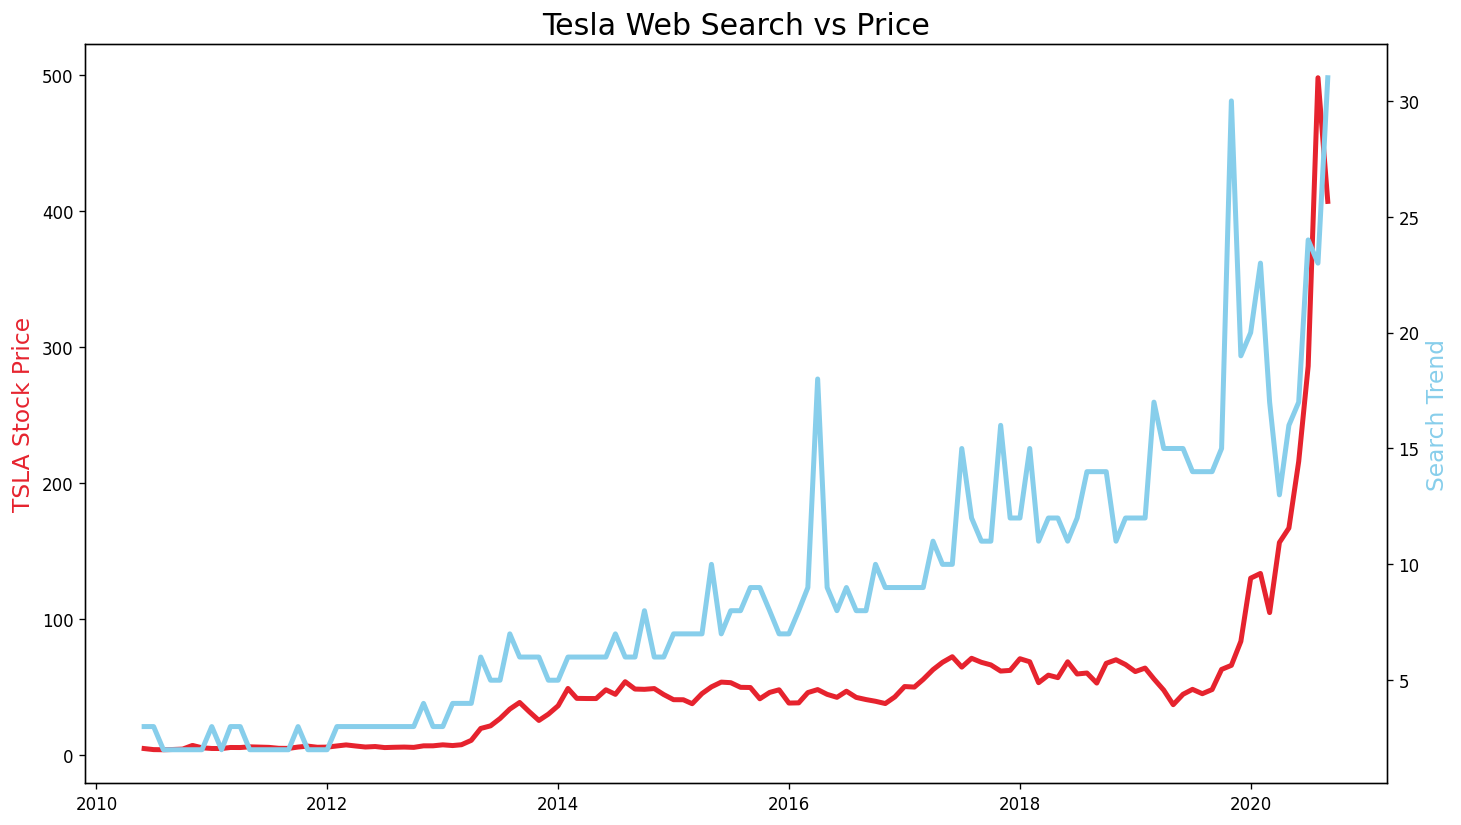

In [102]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.plot(df_tsla.MONTH, df_tsla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tsla.MONTH, df_tsla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

Create the same chart for Bitcoin
Modify the chart title to read 'Bitcoin News Search vs Resampled Price'

Change the y-axis label to 'BTC Price'

Investigate the linestyles to make the BTC closing price a dashed line

Investigate the marker types to make the search datapoints little circles

Were big increases in searches for Bitcoin accompanied by big increases in the price?

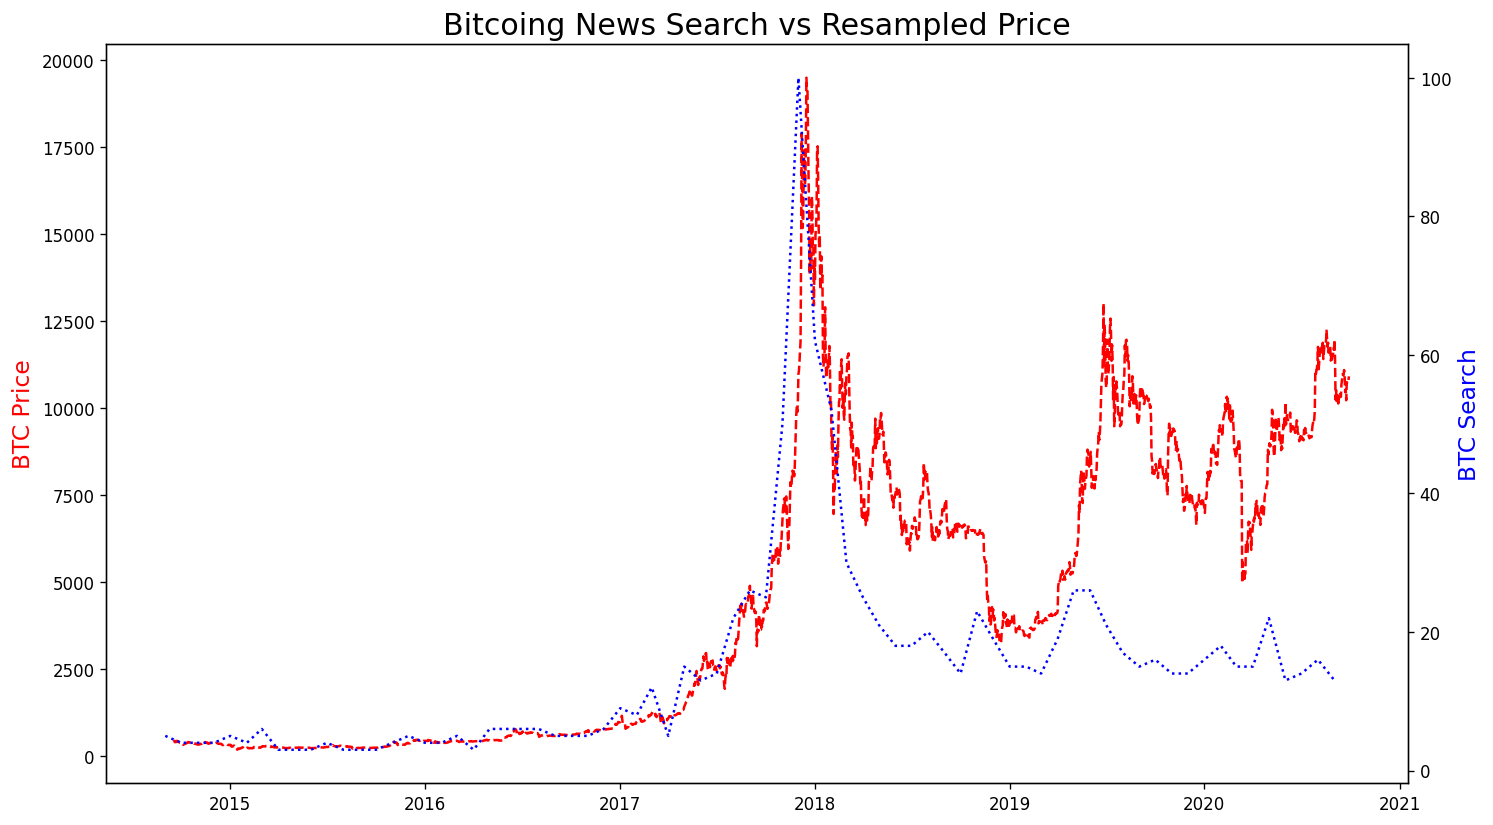

In [103]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoing News Search vs Resampled Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='red', fontsize=14)
ax2.set_ylabel('BTC Search', color='blue', fontsize=14)

ax1.plot(df_btc_price.DATE, df_btc_price.CLOSE, color='red', linestyle='--')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='blue', linestyle='dotted')

plt.show()

Plot the search for "unemployment benefits" against the official unemployment rate.

Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate

Change the y-axis label to: FRED U/E Rate

Add a grey grid to the chart to better see the years and the U/E rate values. Use dashed lines for the line style.

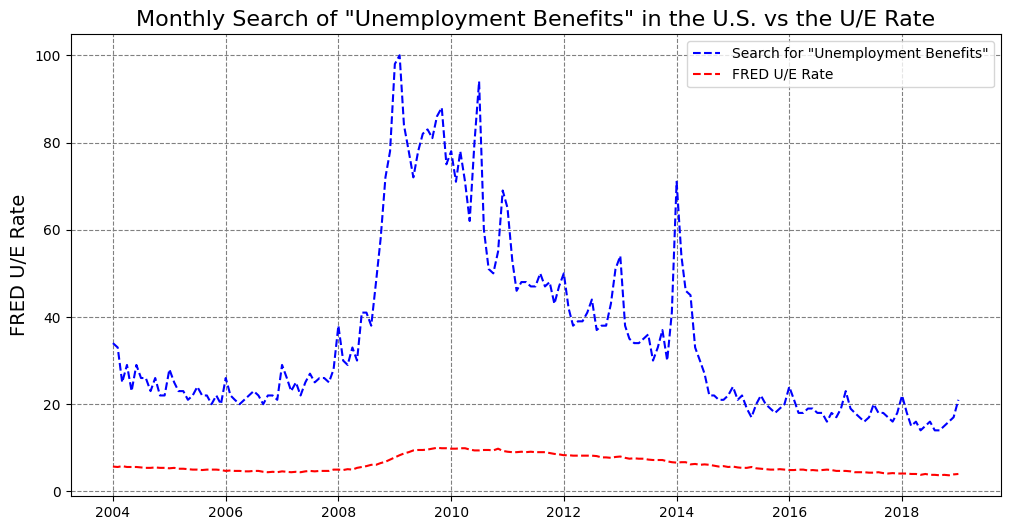

In [104]:
plt.figure(figsize=(12, 6))

plt.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='blue', linestyle='--', label='Search for "Unemployment Benefits"')
plt.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='red', linestyle='--', label='FRED U/E Rate')

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=16)

plt.ylabel('FRED U/E Rate', fontsize=14)

plt.grid(color='grey', linestyle='--')

plt.legend()

plt.show()

Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see? Which line moves first?

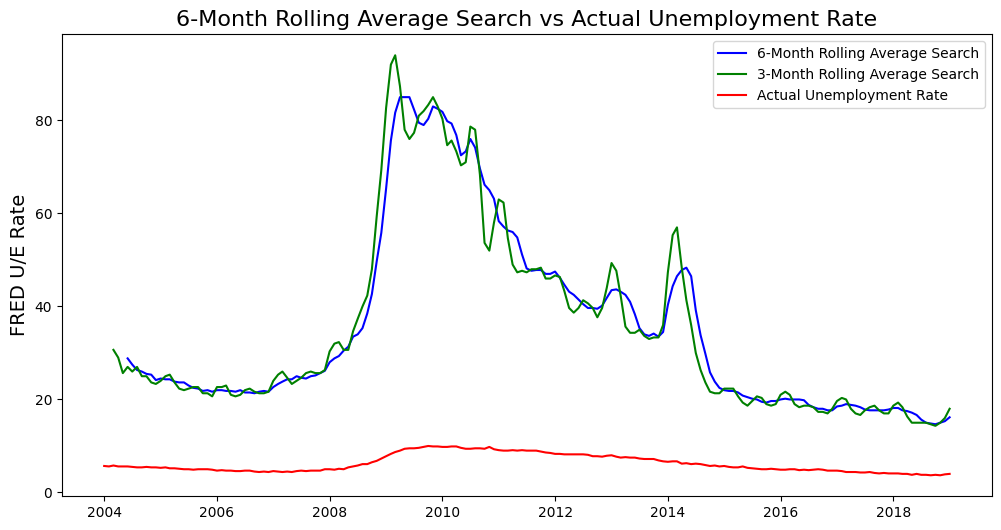

In [105]:
rolling_avg_search_6 = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()
rolling_avg_search_3 = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_unemployment['MONTH'], rolling_avg_search_6, color='blue', label='6-Month Rolling Average Search')
plt.plot(df_unemployment['MONTH'], rolling_avg_search_3, color='green', label='3-Month Rolling Average Search')
plt.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='red', label='Actual Unemployment Rate')

plt.title('6-Month Rolling Average Search vs Actual Unemployment Rate', fontsize=16)

plt.ylabel('FRED U/E Rate', fontsize=14)

plt.legend()

plt.show()

Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart

In [106]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020['MONTH'] = pd.to_datetime(df_ue_2020.MONTH)
df_ue_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


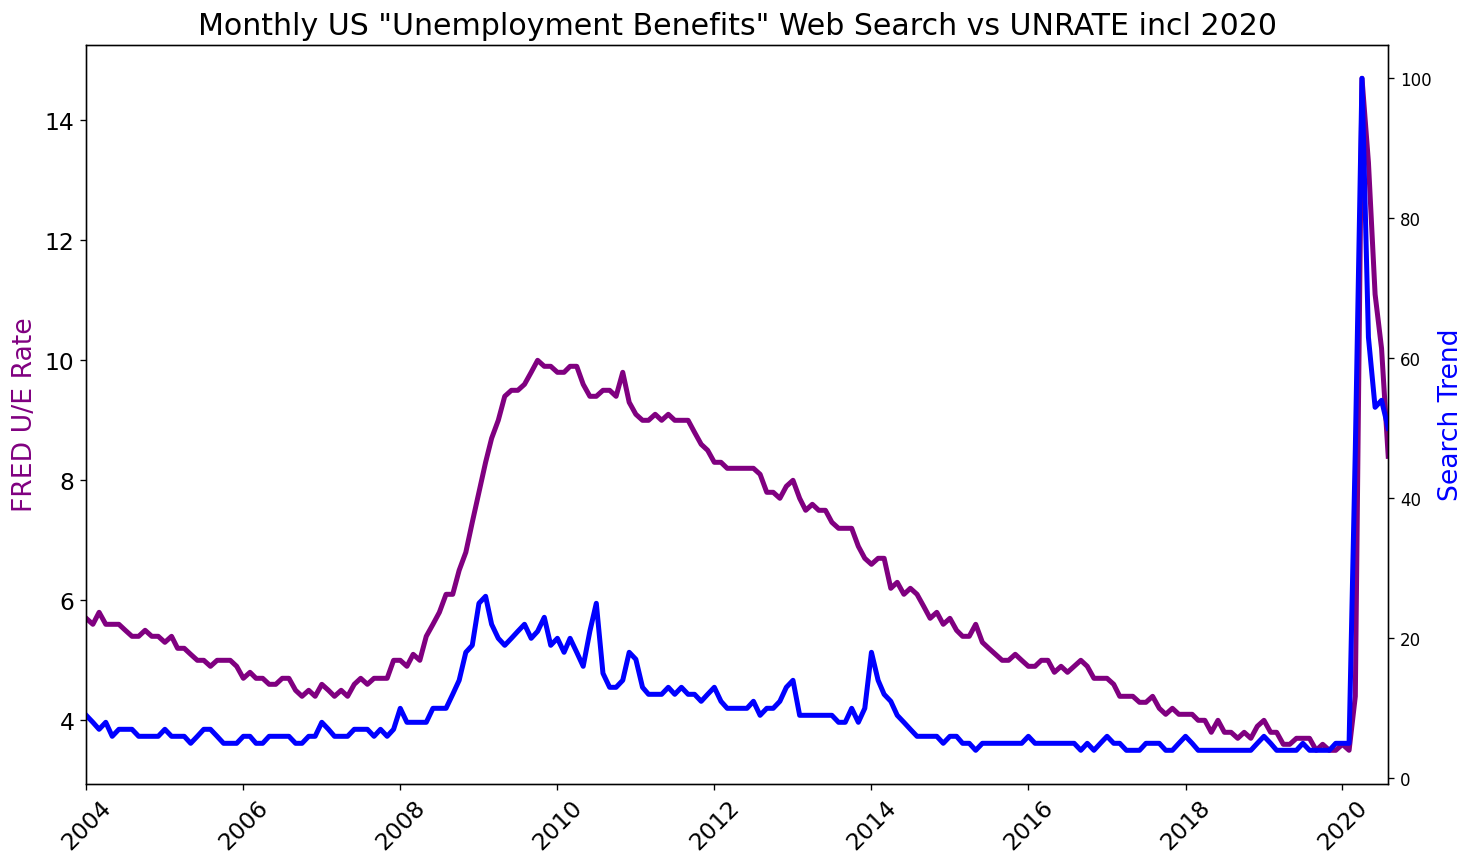

In [110]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='blue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'blue', linewidth=3)

plt.show()